<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 2*

---

# N412. 경사하강법(Gradient Descent)과 역전파(Backpropagation)

## 🛫 Warm Up

- [역전파 미적분 | 딥러닝](https://youtu.be/tIeHLnjs5U8) - 3Blue1Brown
- [Neural Networks Demystified (Part 4: Backpropagation)
](https://youtu.be/GlcnxUlrtek) - Welch Labs : 학습 과정을 잘 모사한 영상입니다.

### 지난 시간 내용 복습하기

- **인공지능의 역사**

- **퍼셉트론(Perceptron)과 논리 게이트(AND, NAND, OR 그리고 XOR)**

- **신경망의 기본 구조**
    - Input
    - Activation function
    - Output

- **신경망의 동작 원리**
    - 데이터 전처리 및 입력
    - 모델 제작 및 가중치 초기화
    - 모델에 데이터를 넣고 출력값을 얻음
    - 출력값과 레이블(정답지)과 비교 후 Loss 계산
    - Loss를 반영하여 가중치 업데이트 -> 이번 강의에서 배우게 될 **역전파(BackPropagation) + 경사하강법(Gradient Descent)**

## 🏆 학습 목표

- **경사 하강법(Gradient descent)과 역전파(Backpropagation)**에 대해 이해하고 설명할 수 있다.
- **케라스(`Keras`) 프레임워크를 이용하여 모델을 구축**할 수 있다.

---

## 역전파를 배우기 전에

> ❗️ ***오늘 배울 <font color="ff6f61">역전파와 경사 하강법은 신경망을 처음 배울 때에 가장 어려운 부분</font>입니다.<br/>
처음부터 수학적인 내용을 모두 이해하지 못해도 좋습니다.<br/>
일단 역전파를 통한 신경망 학습을 개념적으로 이해한 뒤에, 강의와 노트를 반복하면서 내용을 이해하려 시도해보시면 좋겠습니다 :)***

먼저 어제 배웠던 내용을 한 번 돌아본 후에 역전파로 넘어가도록 하겠습니다.

### 신경망 구조 (recap.)

이번 강의에서는 신경망이 어떻게 훈련되는지에 대해 조금 더 깊게 알아보도록 하겠습니다.

지난 강의에서 신경망의 학습(Training)이란 **적절한 '가중치'를 찾아가는 과정**임을 배웠습니다.
그렇다면 어떻게 신경망은 스스로 적절한 가중치를 찾을 수 있는 것일까요?

그 답은 바로, 이번 시간에 배울 **<font color="ff6f61">경사 하강법(Gradient descent, GD)과 역전파(Backpropagation, BP)</font>**입니다.<br/>
조금 더 자세하게 말하면 경사 하강법에 필요한 기울기(Gradient)계산을 역전파 알고리즘을 통해 구하게 됩니다.

지난 강의에서 학습했던 신경망의 기본적인 구조와 연산에 대해 간략히 짚어보겠습니다.
 

<img src="https://i.imgur.com/dlGareT.gif" alt="backpropagation">

- 신경망에는 크게 3개의 층 **[=입력층(Input layer), 은닉층(Hidden layer), 출력층(output layer)]**이 존재합니다.

- 각 층은 한 개 이상의 노드(Node)로 구성되어 있으며, 각 노드는 **가중치(Weight)와 편향(Bias)**으로 연결되어 있습니다.

- **<font color="ff6f61">순전파</font> : 입력층에서 입력된 신호가 은닉층의 연산을 거쳐 출력층에서 값을 내보내는 과정**
    - 입력층(왼쪽)에서부터 출력층(오른쪽) 방향으로 데이터가 전달됩니다.
        1. 입력층으로부터(혹은 이전 은닉층으로부터) 신호(데이터)를 전달받습니다.
        2. 입력된 데이터를 가중치 및 편향과 연산한 뒤에 더해줍니다.(가중합, weighted sum)
        3. 가중합을 통해 구해진 값은 활성화 함수(Activation function)를 통해 다음 층으로 전달됩니다.
        
특정 층에 입력되는 데이터의 특성이 $n$ 개인 경우 이 과정을 수식으로 나타내면 다음과 같이 나타낼 수 있습니다.<br/>
(아래 식에서 활성화 함수는 시그모이드 함수입니다.)

\begin{align}
 y = \text{sigmoid}\bigg(\sum( b + w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n})\bigg)
\end{align}

### 경사 하강법과 역전파 미리 맛보기 : 신경망 학습 알고리즘 요약

오늘 배울 내용을 간략하게 줄여보겠습니다.

> ❗️ ***당장 아래 요약을 이해하지 못해도 좋습니다. 아래에서 하나씩 자세하게 살펴볼 예정입니다.<br/>
게다가 원래 역전파를 단번에 이해하기란 어렵습니다. 갑자기 수식이 너무 많이 등장한다고 좌절하지 않아도 됩니다.***

1. **데이터와 목적에 맞게 신경망 구조를 설계**합니다.
    - 입력층 노드(유닛) 수 = **데이터의 Feature 수로 설정합니다.**
    - 출력층 노드(유닛) 수 = **문제(분류, 회귀 등)에 따라 다르게 설정합니다.**
    - 은닉층 수와 각 은닉층의 노드 수를 결정합니다.
2. **가중치를 랜덤하게 초기화** 해줍니다. (초기화 방법에 대해서는 다음에 배울 것입니다.)
3. 순전파를 통해 출력값($h_{\theta}(x^{(i)})$) 을 모든 입력 데이터($x^{(i)}$)에 대해 계산합니다.
4. **비용 함수(Cost function**, $J(\theta)$)를 계산합니다.
5. **역전파**를 통해 각 가중치에 대한 편미분 값($\partial J(\theta)/\partial\theta_{jk}^{l}$) 을 계산합니다.
6. **경사하강법을 사용하여 비용함수인 ($J(\theta)$)를 최소화하는 방향으로 가중치를 갱신**합니다.
7. **중지 기준을 충족하거나 비용 함수를 최소화 할 때까지 2-5 단계를 반복**합니다. 2-5 단계를 한 번 진행하는 것을 **iteration** 라고 합니다.

- **<font color="ff6f61">비용 함수(Cost Function) 혹은 손실 함수(Loss function)</font>**

신경망은 손실 함수를 최소화 하는 방향으로 가중치를 갱신합니다.<br/>
그렇기 때문에 손실 함수를 잘 정의해주어야 가중치가 제대로 갱신될 수 있겠죠?

입력 데이터를 신경망에 넣어 순전파를 거치면 마지막 출력층을 통과한 값이 도출됩니다.<br/>
출력된 값과 그 데이터의 타겟값을 **손실 함수에 넣어 손실(Loss or Error)를 계산**합니다.<br/>
한 데이터 포인트에서의 손실을 **Loss** 라고 하며, 전체 데이터셋의 Loss를 합한 개념을 **Cost** 라고 합니다.

대표적인 손실 함수는 MSE, Cross-Entropy 등이 있습니다.

신경망 학습에는 다른 머신러닝 알고리즘들 보다 **훨씬 많은** 훈련 데이터가 필요합니다.<br/>
그에 따라 훈련 시간도 오래 걸리고 최적화를 위해서 더 많은 **하이퍼파라미터를 튜닝**해 주어야 합니다.<br/>
이렇게 복잡한 신경망을 훈련하기 위해서는 특별한 방법이 필요합니다, 바로 **역전파(Backpropagation) 알고리즘** 입니다.

그럼 이제 신경망을 훈련시키는 역전파 알고리즘을 제대로 배워보도록 하겠습니다.


## 역전파(Backpropagation, BP)

**<font color="ff6f61">역전파(Backpropagation)</font>**는 ["Backwards Propagation of Errors"](https://en.wikipedia.org/wiki/Backpropagation)의 줄임말 입니다.<br/>
말 그대로 순전파와는 **반대 방향으로 손실(Loss or Error) 정보를 전달**해주는 역할을 합니다.

순전파가 **입력 신호 정보를 입력층부터 출력층까지 전달하여 값을 출력**하는 알고리즘이었다면,<br/>
역전파는 구해진 **손실 정보를 출력층부터 입력층까지 전달하여 각 가중치를 얼마나 업데이트 해야할지를 결정**하는 알고리즘입니다.

매 iteration 마다 구해진 **손실(Loss)을 줄이는 방향**으로 가중치를 업데이트합니다.<br/>
그렇다면 **손실을 줄이는 방향**이 어떤 방향인지를 알 수 있을까요?
이 방향을 결정하는 것이 바로 **<font color="ff6f61">경사 하강법(Gradient Descent, GD)</font>**입니다.

경사 하강법과 역전파를 이해하기 위해서는 **미분법**에 대한 이해가 필요합니다.<br/>
수식에 대한 설명은 Warm Up 영상을 참고하여 익숙해져 보도록 합시다.

지난 강의에서는 신경망의 순전파(Feed-Forward Propagation)에 대해서 배웠습니다.<br/>
그리고 경사 하강법과 역전파에 대해서도 코드로 잠시 다루어보았는데요.<br/>
이번 시간에는 경사 하강법과 역전파 부분을 자세히 알아보도록 하겠습니다.



<img src="https://i.imgur.com/Y5XVbrp.png" title="https://becominghuman.ai/understanding-the-structure-of-neural-networks-1fa5bd17fef0" width="600" />

### 예제를 통해서 이해해보기


**`공부시간`** 과 **`수면시간`** 을 특성(Feature)으로 하고 시험 점수를 레이블로 하는 회귀 예제를 풀어봅시다.<br/>
데이터에서 특성과 레이블은 아래와 같은 선형 관계를 이루고 있다고 가정하겠습니다.<br/>
아래 식에서 $x_1$ 은 **`공부시간`**을 나타내고 $x_2$ 는 **`수면시간`**을 나타낸다고 해보겠습니다.

$y = 5x_1 + 2x_2 + 40$

그리고 신경망이 위 관계를 알아서 잘 찾아낼 수 있는지를 알아보겠습니다.

1. **필요한 패키지를 `import` 하고 랜덤 시드(random seed)를 고정합니다.**

In [ ]:
# 해당 코드는 선형함수를 예측하는 예제입니다. 
import numpy as np

np.random.seed(812)

2. **임의의 특성 데이터로부터 관계를 만족하는 레이블을 도출한 뒤에 데이터셋을 만듭니다.**

In [ ]:
# [공부시간, 수면시간]
X = np.array(([8,8],
              [2,5],
              [7,6]), dtype=float)

# 선형 관계를 바탕으로 시험 점수 레이블을 생성합니다.
y = X[:,0]*5 + X[:,1]*2
y = y.reshape(3,1)

3. **특성을 정규화(Normalization) 합니다.**

각 특성 및 레이블의 최댓값으로 나누어 주어 0~1 사이의 값으로 만들어줍니다.

In [ ]:
X = X / np.amax(X, axis=0)
y = y / np.amax(y, axis=0)

print("공부시간, 수면시간 \n", X)
print("시험점수 \n", y)

공부시간, 수면시간 
 [[1.    1.   ]
 [0.25  0.625]
 [0.875 0.75 ]]
시험점수 
 [[1.        ]
 [0.35714286]
 [0.83928571]]


4. **신경망을 구축합니다.**

> ❗️ ***클래스 개념이 익숙하지 않을 수 있습니다.<br/>
클래스 자체의 의미보다는 주석을 따라 코드를 한줄 한줄 따라가 보도록 합시다.***

`NeuralNetwork` 클래스 내 `__init__` 메소드(함수)에서 신경망을 구축합니다.

In [ ]:
class NeuralNetwork:
    """
    신경망(Neural network)를 정의하는 클래스(Class) 선언
    """
    def __init__(self):
        """
        신경망의 구조를 결정합니다.

        inputs : 입력층 노드 수
        hiddenNodes : 은닉층 노드 수
        outputNodes : 출력층 노드 수
        w1, w2 : 은닉층(layer 1), 출력층(layer 2)의 가중치
        """
        
        self.inputs = 2
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        # 가중치를 초기화 합니다.
        # layer 1 가중치 shape : 2x3
        self.w1 = np.random.randn(self.inputs,self.hiddenNodes)
        
        # layer 2 가중치 shape : 3x1
        self.w2 = np.random.randn(self.hiddenNodes, self.outputNodes)

> ❓ ***왜 입력 노드의 수는 2로 해주었을까요?***<br/>
❓ ***왜 출력 노드의 수는 1로 해주었을까요?***<br/>
❓ ***왜 `layer 1, layer 2`의 가중치 행렬 shape 은 각각 2X3, 3X1 로 설정하였을까요?***

> ❗️ ***신경망에서 <font color="ff6f61">가중치 행렬의 `shape`은 굉장히 중요하면서도 헷갈리는 부분</font>입니다.<br/>
단번에 완벽히 이해할 수는 없겠지만 반복하여 보면서 익숙해져 봅시다!***

실제로 가중치가 어떻게 생성되었는지 출력해봅시다.

In [ ]:
# 정의된 클래스를 사용해보고, 해당 가중치를 디스플레이 하는 코드입니다. 
nn = NeuralNetwork()

print("Layer 1 가중치: \n", nn.w1)
print("Layer 2 가중치: \n", nn.w2)

Layer 1 가중치: 
 [[ 2.48783189  0.11697987 -1.97118428]
 [-0.48325593 -1.50361209  0.57515126]]
Layer 2 가중치: 
 [[-0.20672583]
 [ 0.41271104]
 [-0.57757999]]


- **Review : 행렬의 곱셈 연산**

$A_{l \times m}, B_{m \times n}$ 두 행렬을 곱할 때 $\Rightarrow (AB)_{l \times n}$<br/>
결과값으로 나오는 행렬의 shape은 $\big($<font color='red'>$l$</font> $\times$ <font color='blue'>$m$</font>$\big)$ $\cdot$ $\big($ <font color='blue'>$m$</font> $\times$ <font color='green'>$n$</font> $\big)$ = <font color='red'>$l$</font> $\times$ <font color='green'>$n$</font> 행렬의 형태로 연산이 됩니다.

아래 그림을 참조하여 행렬의 곱셈 연산에 대한 내용을 다시 떠올려봅시다.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Matrix_multiplication_qtl1.svg" width="450" />

5. **순전파 기능을 추가로 구현합니다.**

**기존 `NeuralNetwork` 클래스에 순전파 기능을 추가**하여 봅시다.<br/>
순전파에 필요한 활성화 함수(sigmoid)를 구현한 뒤에 가중합(weighted sum)부분과 활성화 함수가 적용되는 부분을 구현합니다.

In [ ]:
class NeuralNetwork:
    
    def __init__(self):
        """
        신경망의 구조를 결정합니다.

        inputs : 입력층 노드 수
        hiddenNodes : 은닉층 노드 수
        outputNodes : 출력층 노드 수
        w1, w2 : layer 1, layer 2의 가중치
        """
        self.inputs = 2
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        # 가중치를 초기화 합니다.
        # layer 1 가중치 shape : 2x3
        self.w1 = np.random.randn(self.inputs,self.hiddenNodes)
        
        # layer 2 가중치 shape : 3x1
        self.w2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        """
        활성화 함수인 시그모이드 함수를 정의합니다.
        s : 활성화 함수에 입력되는 값(=가중합)
        """
        return 1 / (1+np.exp(-s))
    
    def feed_forward(self, X):
        """
        순전파를 구현합니다.
        입력 신호를 받아 출력층의 결과를 반환합니다.
        
        hidden_sum : 은닉층(layer 1)에서의 가중합(weighted sum)
        activated_hidden : 은닉층(layer 1) 활성화 함수의 함숫값
        output_sum : 출력층(layer 2)에서의 가중합(weighted sum)
        activated_output : 출력층(layer 2) 활성화 함수의 함숫값
        """
        
        self.hidden_sum = np.dot(X, self.w1)
        self.activated_hidden = self.sigmoid(self.hidden_sum)

        self.output_sum = np.dot(self.activated_hidden, self.w2)
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output

6. **순전파를 거쳐 출력되는 값을 알아봅시다.**

입력한 데이터가 신경망 순전파를 거쳐 어떤 출력값을 내는 지 확인해봅니다.

In [ ]:
# 선언한 클래스를 불러와서 할당합니다.
nn = NeuralNetwork()

In [ ]:
# 첫 번째 데이터를 출력합니다.
print(X[0])

[1. 1.]


In [ ]:
# 첫 번째 데이터를 입력한 뒤 신경망이 출력하는 값을 살펴보겠습니다.
output = nn.feed_forward(X[0])
print("예측값: ", output)

예측값:  [0.21945787]


7. **손실(Error,Loss)과 비용(Cost) 계산**

1개의 데이터에 대해 실제 타겟 레이블과 출력값을 비교하여 손실(`error`)을 구해봅니다.

In [ ]:
# 실제 타겟 레이블과 출력값을 비교하여 손실(error)을 구합니다.
error = y[0] - output
error

array([0.78054213])

이 과정을 모든 데이터에 적용하여 비용(Cost)를 구해봅시다.

In [ ]:
# 모든 데이터를 예측해보고 에러값을 계산해 보겠습니다.
print(X)

[[1.    1.   ]
 [0.25  0.625]
 [0.875 0.75 ]]


In [ ]:
output_all = nn.feed_forward(X)
print(output_all)

[[0.21945787]
 [0.34573206]
 [0.23788921]]


In [ ]:
error_all = y - output_all
print(error_all)

[[0.78054213]
 [0.0114108 ]
 [0.6013965 ]]


#### 결과값 분석

1. 각각의 **에러가 작어야 하는데 너무 크게 나왔습니다.** 에러가 크게 나오는 이유는 무엇일까요?
    - 에러가 높게 나오는 이유는 예측값이 **정확하지 않기(여기서는 너무 작게 나오기) 때문**입니다.

2. 그렇다면 **예측값이 작게 나오는 이유**는 무엇일까요?
    - 임의로 지정하였던 두 번째 층의 가중치 값(`w2`)이 작거나
    - 첫 번째 층의 출력값(`activated_hidden`)이 작기 때문입니다.

3. **첫 번째 층의 출력값(`activated_hidden`)이 작은 이유**는 무엇일까요?
- 입력 데이터(`X`)는 변하지 않는 값이므로 첫 번째 층의 가중치 값(`w1`)이 작기 때문입니다.

**1, 2, 3**을 고려했을 때 예측값을 증가시키기 위한 방법은 **첫 번째 층과 두 번째 층의 가중치(`w1, w2`)를 증가시키는 것**뿐입니다.

이렇게 각 층마다 가중치가 있을텐데 에러를 최소화하기 위해서 어떤 가중치를 얼마나 올려주어야 할까요?<br/>
일단 각 층의 가중치를 출력해보겠습니다.

In [ ]:
# 각각의 변수(가중치)를 디스플레이 하기 위한 코드입니다.
attributes = ['w1', 'hidden_sum', 'activated_hidden', 'w2', 'activated_output']

for i in attributes:
    if i[:2] != '__':
        print(i+'\n', getattr(nn,i), '\n'+'---'*3)

w1
 [[-1.75351135  1.23279898  0.24464757]
 [-0.06568225  0.30190098  0.79723428]] 
---------
hidden_sum
 [[-1.8191936   1.53469996  1.04188185]
 [-0.47942924  0.49688786  0.55943332]
 [-1.58358412  1.30512484  0.81199233]] 
---------
activated_hidden
 [[0.13953066 0.82269293 0.73921295]
 [0.38238691 0.62172769 0.63632141]
 [0.17028848 0.78669622 0.6925339 ]] 
---------
w2
 [[ 1.23073545]
 [-1.52187331]
 [-0.25502715]] 
---------
activated_output
 [[0.21945787]
 [0.34573206]
 [0.23788921]] 
---------


#### 손실(Error)을 줄이기 위해서는 어떻게 해야 할까요?

아래 그림을 보면 알 수 있듯, **비용 함수 $J$ 의 경사(Gradient)가 작아지는 방향으로 업데이트** 하면 손실 함수의 값을 줄일 수 있습니다.<br/>
매 Iteration 마다 **<font color="ff6f61">해당 가중치에서의 비용 함수의 도함수(=비용 함수를 미분한 함수)를 계산</font>하여** 경사가 작아질 수 있도록 가중치를 변경합니다.

<img src="https://i.imgur.com/ehYYRtw.png" alt="Gradient Descent in 1D" width="700"/>

위에서 설계한 신경망은 총 9개의 가중치를 가지고 있습니다. 첫 번째 층에는 6개(`w1`), 두 번째 층에는 3개(`w2`)가 있죠.<br/>
그렇기 때문에 해당 신경망의 비용 함수는 9차원 공간상의 함수$(J)$가 되겠습니다.<br/>
비용 함수의 경사가 줄어드는 방향으로 가중치를 갱신해나가면 되겠죠?

비용 함수 $J$를 수식으로 나타내 보겠습니다.

$$
J(\theta) = J(\theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6, \theta_7, \theta_8, \theta_9)
$$

아래는 비용 함수를 가중치 2개에 대해서만 단순화시켜 나타낸 그림입니다.

<img src="https://i.imgur.com/yZA6RUJ.png" alt="Gradient descent algorithm direction Equation 1. (Image courtesy of Andrew Ng)" width="600"/>

- **볼록/오목 함수(Convex/Concave function)와 지역 최적점(Local Optima)**

경사 하강법을 통해 최저점을 찾는 메커니즘은 볼록(Convex) 함수에서만 잘 동작합니다.<br/>
하지만 실제 손실 함수는 위 그림처럼 볼록 함수와 오목 함수가 부분부분 섞여있는 형태인데요.<br/>
그렇기 때문에 전역 최적점(Global Optima)를 찾지 못하고 **지역 최적점(Local Optima)에 빠질 수 있습니다.**

지역 최적점에 빠지게 되는 문제를 방지하기 위한 여러가지 방법이 있는데요.<br/>
이런 알고리즘에 대해서는 잠시 후에 알아보도록 하겠습니다.

> ❗️ ***볼록 함수(Convex function)와 오목 함수(Concave function)의 수학적인 의미보다는 각 함수가 대략 어떤 형태인지 알아봅시다.<br/>
각 함수의 형태로부터 볼록 함수에서는 왜 경사 하강법이 잘 되고, 오목 함수에서는 안 될지 상상해봅시다.***

> 🔍 ***참조 링크 : [Convex(볼록) & Concave(오목) 알아보기](https://blog.naver.com/sw4r/221148661854) <br/>
추천 검색어 : Convex Optimization, Gradient Descent***

> ❗️ ***그리고 지역 최적점이란 무엇인지, 왜 지역 최적점에 빠지면 안좋은지를 알아봅시다.***

> 🔍 ***추천 검색어 : Gradient Descent Local Optima***


### 가중치 업데이트 : 역전파 

6. **<font color="ff6f61">역전파 기능을 구현</font>해봅시다.**

> ❗️ ***역전파(***`backward`***) 함수 내 과정이 이해가 되지 않을 수 있습니다.<br/>
아래에서 다시 설명이 될 예정이므로 당장 이해가 되지 않더라도 좋습니다.***

> ❗️ ***아래 그림은 역전파 시 각 변수(`o_error`,`o_delta`,`z2_error`,`z2_delta`)의 이해를 돕기 위한 것으로 노드 수는 신경쓰지 않으셔도 됩니다.***

<img src="https://i.imgur.com/brCdkz1.png" width="400">

In [ ]:
# 음수 가중치를 가지는 활성화는 낮추고, 양수 가중치를 가지는 활성화는 높이고 싶습니다.
class NeuralNetwork:
    
    def __init__(self):
        """
        신경망의 구조를 결정합니다.

        inputs : 입력층 노드 수
        hiddenNodes : 은닉층 노드 수
        outputNodes : 출력층 노드 수
        w1, w2 : layer 1, layer 2의 가중치
        """
        self.inputs = 2
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        # 가중치를 초기화 합니다.
        # layer 1 가중치 shape : 2x3
        self.w1 = np.random.randn(self.inputs,self.hiddenNodes)
        
        # layer 2 가중치 shape : 3x1
        self.w2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        """
        활성화 함수인 시그모이드 함수를 정의합니다.
        s : 순전파 과정에서 활성화 함수에 입력되는 값(=가중합)
        """
        return 1 / (1+np.exp(-s))

    def sigmoidPrime(self, s):
        """
        활성화 함수(sigmoid)를 미분한 함수입니다.
        s : 순전파 과정에서 활성화 함수에 입력되는 값(=가중합)
        """
        sx = self.sigmoid(s)
        return sx * (1-sx)
    
    def feed_forward(self, X):
        """
        순전파를 구현합니다.
        입력 신호를 받아 출력층의 결과를 반환합니다.
        
        hidden_sum : 은닉층(layer 1)에서의 가중합(weighted sum)
        activated_hidden : 은닉층(layer 1) 활성화 함수의 함숫값
        output_sum : 출력층(layer 2)에서의 가중합(weighted sum)
        activated_output : 출력층(layer 2) 활성화 함수의 함숫값
        """
        
        self.hidden_sum = np.dot(X, self.w1)
        self.activated_hidden = self.sigmoid(self.hidden_sum)

        self.output_sum = np.dot(self.activated_hidden, self.w2)
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        역전파를 구현합니다.
        출력층에서 손실 값(Error)를 구한 뒤에 이를 각 가중치에 대해 미분한 값만큼 가중치를 수정합니다.

        X : 입력 데이터(input)
        y : 타겟값(target value)
        o : 출력값(output)

        o_error : 손실(Error) = 타겟값과 출력값의 차이
        o_delta : 출력층 활성화 함수의 미분값
        """
        
        # o_error : 손실(Error)을 구합니다.
        self.o_error = y - o 
        
        # o_delta : 활성화 함수(시그모이드)의 도함수를 사용하여 출력층 활성화 함수 이전의 미분값을 구합니다.
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error : 은닉층에서의 손실을 구합니다.
        self.z2_error = self.o_delta.dot(self.w2.T)
        
        # z2 delta : 활성화 함수(시그모이드)의 도함수를 사용하여 은닉층 활성화 함수 이전의 미분값을 구합니다.
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.output_sum)

        # w1, w2를 업데이트 합니다.
        self.w1 += X.T.dot(self.z2_delta) # X * dE/dY * dY/dy(=Y(1-Y))
        self.w2 += self.activated_hidden.T.dot(self.o_delta) # H1 * Y(1-Y) * (Y - o)
        
    def train(self, X, y):
        """
        실제로 신경망 학습을 진행하는 코드입니다.
        1번의 순전파-역전파, 즉 1 iteration 을 수행하는 함수입니다.
        
        X : 입력 데이터(input)
        y : 타겟값(target value)
        """
        o = self.feed_forward(X)
        self.backward(X,y,o)

> ❗️ ***당장 아래 수식을 이해하지 못해도 좋습니다. 아래에서 수학을 통해 알아볼 것입니다.<br/>
다만 나중에는 수식만 보고도 이해할 수 있어야겠죠?***

- 수식을 통해 위 코드를 알아보겠습니다.

    손실(Error) : $E$<br/>
출력층 활성화 함수의 출력값(`activated_output`) : $A_O$<br/>
출력층 활성화 함수의 입력값(=가중합, `output_sum`) : $S_O$<br/>
은닉층 활성화 함수의 출력값(`activated_hidden`) : $A_H$<br/>
은닉층 활성화 함수의 입력값(=가중합, `hidden_sum`) : $S_H$

- **$w_2$(=출력층과 은닉층 사이의 가중치) 에 대한 미분**

$$
\begin{aligned}
\frac{\partial E}{\partial w_2} &= \frac{\partial E}{\partial A_O} \cdot \frac{\partial A_O}{\partial w_2}\\
\frac{\partial E}{\partial w_2} &= \frac{\partial E}{\partial A_O} \cdot 
\frac{\partial A_O}{\partial S_O} \cdot \frac{\partial S_O}{\partial w_2}
= \frac{\partial E}{\partial A_O} \cdot 
\frac{\partial A_O}{\partial S_O} \cdot A_H \quad \bigg( \because A_H = \frac{\partial S_O}{\partial w_2}\bigg)
\end{aligned}
$$


- **$w_1$(=은닉층과 입력층 사이의 가중치) 에 대한 미분**

$$
\begin{aligned}
\frac{\partial E}{\partial w_1} &= \frac{\partial E}{\partial A_H} \cdot \frac{\partial A_H}{\partial w_1}\\
\frac{\partial E}{\partial w_2} &= \frac{\partial E}{\partial A_H} \cdot 
\frac{\partial A_H}{\partial S_H} \cdot \frac{\partial S_H}{\partial w_1}
= \frac{\partial E}{\partial A_H} \cdot 
\frac{\partial A_H}{\partial S_H} \cdot X \quad \bigg( \because X = \frac{\partial S_H}{\partial w_1}\bigg)
\end{aligned}
$$



#### 역전파가 추가된 신경망 클래스 학습

- **순전파 후 손실(Error) 계산**

In [ ]:
nn = NeuralNetwork()
nn.train(X,y)

In [ ]:
# 순전파 후 손실(Error)을 확인해보겠습니다.
nn.o_error

array([[0.70644301],
       [0.10036169],
       [0.56649547]])

- **출력층의 경사(Gradient) 계산하기**

**에러(Error, `o_error`)**와 **출력층 활성화 함수를 미분한 함수(`sigmoidPrime`)**를 통해서 출력층의 경사(`o_delta`)를 구해보겠습니다.

`self.o_delta = self.o_error * self.sigmoidPrime(self.output_sum)`

In [ ]:
# 순전파 시 출력층에서의 가중합
nn.o_error

array([[0.70644301],
       [0.10036169],
       [0.56649547]])

In [ ]:
# 순전파 시 출력층에서의 가중합을 활성화 함수에 통과시킨 
nn.sigmoidPrime(nn.o_error)

array([[0.22123085],
       [0.24937153],
       [0.23096866]])

In [ ]:
# 출력층 활성화 함수 이전의 미분값을 구합니다.
# o_delta = o_error * sigmoidPrime(o)
nn.o_delta

array([[0.17285985],
       [0.02468133],
       [0.13902149]])

- **은닉층이 받는 손실(Error) 계산**

이전 단계에서 구했던 **출력층의 경사(`o_delta`)**와 **출력층의 가중치(`w2`)**를 통해서 은닉층이 받는 손실(`z2_error`)을 구해보겠습니다.

`self.z2_error = self.o_delta.dot(self.w2.T)`

In [ ]:
nn.o_delta.dot(nn.w2.T)

array([[-0.28194591, -0.23236088,  0.12295841],
       [-0.04025689, -0.03317703,  0.01755629],
       [-0.22675329, -0.18687483,  0.09888856]])

> ❗️ ***해당 연산의 결과로 나오는 행렬의 shape이 왜 (3,3)일지에 대해서 생각해보고 토론해봅시다.***

- **은닉층의 경사(Gradient) 계산하기**

**은닉층 에러(`z2_error`)**와 **은닉층 활성화 함수를 미분한 함수(`sigmoidPrime`)**를 통해서 은닉층의 경사(`z2_delta`)를 구해보겠습니다.

`self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)`

In [ ]:
nn.activated_hidden

array([[0.43460965, 0.23985861, 0.42340322],
       [0.37111212, 0.48687214, 0.52242758],
       [0.48093658, 0.2520165 , 0.4192448 ]])

In [ ]:
nn.z2_delta

array([[-0.06388859, -0.05136035,  0.020324  ],
       [-0.00839476, -0.00674859,  0.00267051],
       [-0.04915074, -0.03951252,  0.01563565]])

In [ ]:
X.T.shape == nn.w1.shape

True

In [ ]:
nn.z2_delta

array([[-0.06388859, -0.05136035,  0.020324  ],
       [-0.00839476, -0.00674859,  0.00267051],
       [-0.04915074, -0.03951252,  0.01563565]])

#### 경사 하강법(Gradient Descent)을 적용하여 가중치 업데이트


- 은닉층 가중치(`w1`)를 업데이트 합니다.

> ❗️ ***토론해봅시다.<br/>
1) 왜 입력값(`X`)와 은닉층 기울기 값(`z2_delta`)을 곱해주는 것일까요?<br/>
2) `X`는 왜 Transpose 해주어야 할까요?***


In [ ]:
X.T

array([[1.   , 0.25 , 0.875],
       [1.   , 0.625, 0.75 ]])

In [ ]:
X.T.dot(nn.z2_delta)

array([[-0.10899418, -0.08762095,  0.03467281],
       [-0.10599837, -0.0852126 ,  0.0337198 ]])

- 출력층 가중치(`w2`)를 업데이트 합니다.

> ❗️ ***토론해봅시다.<br/>
1) 왜 첫 번째 층의 출력값(`activated_hidden`)과 출력층의 기울기(`o_delta`)를 곱해주는 것일까요?<br/>
2) 출력층의 shape은 어떻게 3X1이 될까요?***

In [ ]:
nn.activated_hidden.T.dot(nn.o_delta)

array([[0.15114662],
       [0.08851428],
       [0.14436766]])

### 신경망 학습

이제 순전파와 역전파를 정해진 횟수(iterations or epochs)만큼 반복하여 신경망을 학습시켜 보겠습니다.

In [ ]:
nn = NeuralNetwork()

# 반복수(epochs or iterations)를 정합니다.
iter = 10000

# 지정한 반복수 만큼 반복합니다.
for i in range(iter):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 == 0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('입력: \n', X)
        print('타겟출력: \n', y)
        print('예측: \n', str(nn.feed_forward(X)))
        print("에러: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
입력: 
 [[1.    1.   ]
 [0.25  0.625]
 [0.875 0.75 ]]
타겟출력: 
 [[1.        ]
 [0.35714286]
 [0.83928571]]
예측: 
 [[0.37768395]
 [0.40886333]
 [0.39684567]]
에러: 
 0.19523515397548788
+---------EPOCH 2---------+
입력: 
 [[1.    1.   ]
 [0.25  0.625]
 [0.875 0.75 ]]
타겟출력: 
 [[1.        ]
 [0.35714286]
 [0.83928571]]
예측: 
 [[0.45734397]
 [0.47891087]
 [0.47278046]]
에러: 
 0.14787637084266458
+---------EPOCH 3---------+
입력: 
 [[1.    1.   ]
 [0.25  0.625]
 [0.875 0.75 ]]
타겟출력: 
 [[1.        ]
 [0.35714286]
 [0.83928571]]
예측: 
 [[0.52094752]
 [0.53342462]
 [0.5325371 ]]
에러: 
 0.11822041803732024
+---------EPOCH 4---------+
입력: 
 [[1.    1.   ]
 [0.25  0.625]
 [0.875 0.75 ]]
타겟출력: 
 [[1.        ]
 [0.35714286]
 [0.83928571]]
예측: 
 [[0.57039035]
 [0.57514949]
 [0.57861702]]
에러: 
 0.10001317226025601
+---------EPOCH 5---------+
입력: 
 [[1.    1.   ]
 [0.25  0.625]
 [0.875 0.75 ]]
타겟출력: 
 [[1.        ]
 [0.35714286]
 [0.83928571]]
예측: 
 [[0.60862211]
 [0.60709769]
 [0.6141049

출력 결과로 반복 수가 1-5회일 때의 에러와 이후 1000회 마다의 에러를 볼 수 있습니다.<br/>
점점 에러가 줄어드는 경향성을 보이는 것을 확인할 수 있습니다 :)

> ❗️ ***여기까지 간단한 신경망 학습 과정을 파이썬 코드로 직접 구현해보았습니다.<br/>
하지만 <font color="ff6f61">아직 역전파에 대해서 잘 이해하지 못한 분이 대부분</font>일 것으로 생각합니다.<br/>
역전파를 한 번에 이해하기란 쉽지 않은데요. 아래에서 역전파 과정에 대해 한 번 더 설명을 드리도록 하겠습니다.***

그 전에 경사 하강법에서 빠질 수 없는 옵티마이저(Optimizer)에 대해서 다루고 넘어가겠습니다.

## 옵티마이저(Optimizer)

위에서 경사 하강법을 배우면서

> ***지역 최적점에 빠지게 되는 문제를 방지하기 위한 여러가지 방법이 있는데요.<br/>
이런 알고리즘에 대해서는 잠시 후에 알아보도록 하겠습니다.***

라고 남겨둔 부분이 있었는데요.

위 문장에서 '이런 알고리즘'에 해당하는 것이 바로 **<font color="ff6f61">옵티마이저(Optimizer)</font>** 입니다.

옵티마이저는 쉽게 말해 **<font color="ff6f61">경사를 내려가는 방법을 결정</font>**하는데요.<br/>
대표적인 옵티마이저로는 아래와 같은 것들이 있습니다. (다 외우지 않아도 됩니다!)


<img src="https://i.imgur.com/UQfpjpP.png" width="600"/>

이번 강의에서는 **확률적 경사 하강법(`sgd`)** 을 알아보도록 하겠습니다.

### 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

위에서 구현했던 신경망은 모든 입력 데이터에 대해 손실을 계산하고 기울기를 계산한 후에 가중치를 업데이트 하였습니다.<br/>
위 신경망에서는 입력 데이터가 3개 뿐이었기에 이 방법으로도 손실과 그 역전파 값을 금방 구할 수 있었습니다.<br/>

실제 딥러닝에서는 이보다 훨씬 더 큰 데이터를 다루게 됩니다.<br/>
만약 입력 데이터가 3천만개, 3억개 라면 모든 데이터에 대한 손실을 계산하는 과정이 굉장히 오래 걸리겠죠?

<img src="http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width="600"/>


그래서 등장한 것이 바로 **<font color="ff6f61">확률적 경사 하강법</font>**과 **<font color="ff6f61">미니 배치(Mini-batch) 경사 하강법</font>**입니다.

확률적 경사 하강법(`sgd`)은 전체 데이터에서 하나의 데이터를 뽑아서 신경망에 입력한 후 손실을 계산합니다.<br/>
그리고 그 손실 정보를 역전파하여 신경망의 가중치를 업데이트하게 됩니다.

확률적 경사 하강법은 1개의 데이터만 사용하여 손실을 계산하기 때문에 **가중치를 빠르게 업데이트** 할 수 있다는 장점이 있습니다.<br/>
물론 확률적 경사 하강법에도 단점이 있습니다. 1개의 데이터만 보기 때문에 학습 과정에서 불안정한 경사 하강을 보인다는 점인데요.

아래 그림에서 확률적 경사 하강법(왼쪽)과 전체 데이터를 보고 가중치를 수정하는 방식(오른쪽)에서 경사 하강이 어떻게 일어나는 지의 차이를 볼 수 있습니다.

> ❗️ ***아래 그림을 보면서 경사 하강이 왼쪽과 같이 불안정하면 어떤 문제가 발생할 수 있을지 생각해봅시다.***


<img src="https://datascience-enthusiast.com/figures/kiank_sgd.png" width="800">

그래서 두 방법을 적절히 융화한 **미니 배치(Mini-batch) 경사 하강법**이 등장하게 되었습니다.<br/>
N개의 데이터로 미니 배치를 구성하여 해당 미니 배치를 신경망에 입력한 후 이 결과를 바탕으로 가중치를 업데이트합니다.<br/>
일반적으로는 두 방법의 장점을 적절히 융화한 미니 배치 경사 하강법을 많이 사용합니다.

아래 그림에서 확률적 경사 하강법(왼쪽)과 미니 배치 경사 하강법(오른쪽)에서 경사 하강이 어떻게 일어나는 지의 차이를 볼 수 있습니다.

> ❗️ ***iteration, batch-size, epochs, 전체 데이터셋에 있는 데이터의 개수 사이의 관계에 대해 조사해봅시다.***

<img src="https://datascience-enthusiast.com/figures/kiank_minibatch.png" width="800">

### 경사하강법의 변형들(다양한 Optimizer)

위에서 배운 확률적 경사 하강법을 포함하여 다음과 같은 경사 하강법 알고리즘(Optimizer)이 사용되고 있습니다.

1. 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
2. 확률적 경사 하강법(SGD)를 변형한 알고리즘 - Momentum, RMSProp, Adam 등
3. Newton's method 등의 2차 최적화 알고리즘 기반 방법 - BFGS 등

> ❗️ ***특히 BFGS의 경우 당장 이해하지 않아도 좋습니다.***

아래 그림은 여러 가지 옵티마이저가 경사를 어떻게 내려가는 지에 대한 예시입니다.

<img src="https://developer.nvidia.com/blog/wp-content/uploads/2015/12/NKsFHJb.gif" />

여러 가지 옵티마이저 중에서 어떤 것이 가장 좋다고 말하기는 어렵습니다.<br/>
문제마다, 데이터마다 달라지기 때문에 여러 옵티마이저를 적용하면서 서로 비교해보아야 하는데요.

다음 강의에서 최적의 하이퍼파라미터를 찾아보면서 여러 옵티마이저를 비교해 볼 것입니다.

## 수학으로 다시보는 역전파(Backpropagation Review with Math)

위에서 했던 역전파 과정을 수학으로 다시 보도록 하겠습니다.

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp1.png">

---

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp2.png">

---

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp3.png">

---

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp4.png">

---


<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp5.png">


by. Lee

- **오타 수정**

> ### $ \partial E_1 \over \partial H_1 $

$$
\begin{aligned}
\frac{\partial E_1}{\partial H_1} &= \frac{\partial E_1}{\color{blue}{\partial y_1}} \cdot \frac{\color{blue}{\partial y_1}}{\partial H_1} \\
\frac{\partial E_1}{\partial H_1} &= \frac{\partial E_1}{\color{red}{\partial Y_1}} \cdot \frac{\color{red}{\partial Y_1}}{\color{blue}{\partial y_1}} \cdot \frac{\color{blue}{\partial y_1}}{\partial H_1}
\end{aligned}
$$

> ### $ \partial E_2 \over \partial H_1 $

$$
\begin{aligned}
\frac{\partial E_2}{\partial H_1} &= \frac{\partial E_2}{\color{green}{\partial y_2}} \cdot \frac{\color{green}{\partial y_2}}{\partial H_1} \\
\frac{\partial E_2}{\partial H_1} &= \frac{\partial E_2}{\color{orange}{\partial Y_2}} \cdot \frac{\color{orange}{\partial Y_2}}{\color{green}{\partial y_2}} \cdot \frac{\color{green}{\partial y_2}}{\partial H_1}
\end{aligned}
$$

## Keras를 이용한 역전파 실습

[케라스(keras)](https://keras.io)는 신경망 모델을 간편하게 만들고 훈련시킬 수 있는 고수준 신경망 API입니다.

텐서의 조작, 미분 등의 low-level 연산을 만들지 않아도 잘 동작한다는 장점이 있습니다.<br/>
텐서플로우(Tensorflow)를 포함한 프레임워크와 함께 사용할 수 있으며 빠르고 간편한 프로토타이핑이 가능합니다.

케라스에서 신경망을 구축할 때 가장 많이 사용되는 방법 중 하나는 `Sequential` 입ㄴ디ㅏ.<br/>
이 방법은 신경망 각 층을 쌓아올릴 수 있도록 합니다.

- **신경망 학습 메커니즘**

신경망 학습은 다음과 같은 메커니즘으로 구성됩니다.

1. 학습 데이터 로드(Load data)
2. 모델 정의(Define model)
3. 컴파일(Compile)
4. 모델 학습(Fit)
5. 모델 검증(Evaluate)

> ❗️ ***5단계로 이루어진 이 과정은 앞으로도 계속 반복될 것입니다.<br/>
강의 노트의 예제나 과제를 풀며 코드가 등장할 때마다 이 흐름을 잘 기억해두시면 좋겠습니다.***

1. **학습 데이터를 만듭니다.**

In [ ]:
# 앞서 살펴본 선형 데이터를 만들기 위함 함수
def make_samples(n=1000):
    study = np.random.uniform(1, 8, (n, 1))
    sleep = np.random.uniform(1, 8, (n, 1))
    
    y = 5 * study + 2 * sleep + 40
    X = np.append(study, sleep, axis = 1)
    
    # 정규화 
    X = X / np.amax(X, axis = 0)
    y = y / 100
    
    return X, y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X, y = make_samples()
X[:10]

array([[0.76155759, 0.4065224 ],
       [0.78699611, 0.19627527],
       [0.39267953, 0.53940436],
       [0.36391073, 0.99427628],
       [0.64412524, 0.48054391],
       [0.22616247, 0.13942684],
       [0.70853207, 0.3407582 ],
       [0.85016525, 0.44315516],
       [0.26123166, 0.63737043],
       [0.94228448, 0.48463672]])

2. **필요한 라이브러리를 불러온 후 신경망을 구축하고 컴파일(compile)합니다.**

> ❗️ ***아래 코드에서 출력층의 노드 수는 몇 개인지, 출력층의 활성화 함수는 무엇인지, 손실 함수는 어떻게 지정하였는지에 주목해봅시다.***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model = Sequential()

# 신경망 모델 구조 정의
model.add(Dense(3, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성을 마무리 합니다.
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mse'])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 분류인 경우 예시

results = model.fit(X,y, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 1ms/step - loss: 0.0819 - mae: 0.2704 - mse: 0.0819
Epoch 2/50
32/32 [==============================] - 0s 987us/step - loss: 0.0738 - mae: 0.2550 - mse: 0.0738
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0665 - mae: 0.2402 - mse: 0.0665
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0601 - mae: 0.2264 - mse: 0.0601
Epoch 5/50
32/32 [==============================] - 0s 978us/step - loss: 0.0544 - mae: 0.2135 - mse: 0.0544
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0493 - mae: 0.2012 - mse: 0.0493
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0448 - mae: 0.1897 - mse: 0.0448
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0408 - mae: 0.1790 - mse: 0.0408
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0373 - mae: 0.1694 - mse: 0.0373
Epoch 10/50
32/32 [==============

In [ ]:
results.history.keys()

dict_keys(['loss', 'mae', 'mse'])

3. **손실이 어떻게 줄어드는 지 시각화 해봅시다.**

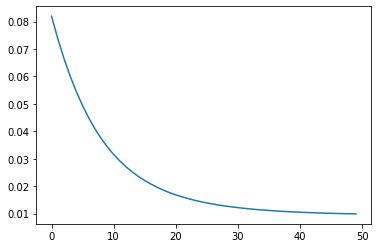

In [ ]:
plt.plot(results.history['loss'])

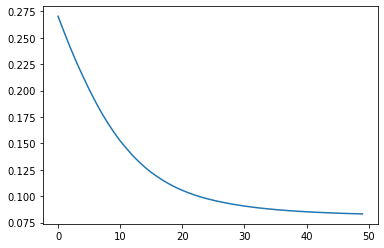

In [ ]:
plt.plot(results.history['mae'])

### Fashion MNIST 예제를 통한 신경망 실습


**"Fashion MNIST"**는 "손글씨 MNIST"와 더불어 신경망으로 이미지 분류 실습을 해볼 수 있는 대표적인 예제입니다.<br/>
Fashion MNIST 예제를 통해 이미지 분류 문제에서 **어떤 전처리 과정이 필요한지, 신경망은 어떻게 구축되어야 하고 학습되는지**에 대해 알아보겠습니다.

전체적인 과정은 위와 유사합니다.

1. **학습 데이터를 불러옵니다.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


2. **불러온 학습 데이터가 어떻게 생겼는지, 혹은 어떤 레이블(label)을 갖는지 확인해보고 정규화합니다.**

In [ ]:
# 데이터를 정규화 합니다
X_train = X_train / 255.
X_test = X_test /255.

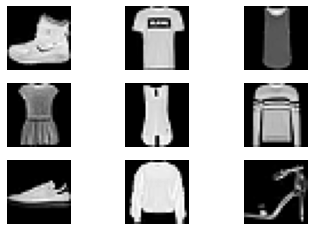

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
    # subplot 정의
    plt.subplot(3, 3, i+1)
    
    # 데이터를 plot 합니다.
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
plt.show()
    

In [ ]:
# 클래스를 확인합니다.
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

3. **필요한 라이브러리를 불러온 후 신경망을 구축하고 컴파일(compile)합니다.**

> ❗️ ***아래 코드에서 출력층의 노드 수는 몇 개인지, 출력층의 활성화 함수는 무엇인지, 손실 함수는 어떻게 지정하였는지에 주목해봅시다.<br/>
`.summary()`를 활용하면 모델의 구조를 빠르게 파악해 볼 수 있습니다.***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


model = Sequential() 
model.add(Flatten(input_shape=(28, 28))) # 28*28 = 784 특성 벡터로 펼쳐 변환해 Dense 층으로 들어갑니다
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam'
             , loss='sparse_categorical_crossentropy'
             , metrics=['accuracy'])

model.summary()
# 총 7850 parameters (10 bias)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


> ❗️ ***위 모델의 파라미터 수는 총 7,850개입니다. 왜 7,850개가 될 지에 대해 생각해봅시다.***

In [ ]:
# 모델 학습
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))
# model.fit(X_train, y_train, epochs=5)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6010 - accuracy: 0.7971 - val_loss: 0.5208 - val_accuracy: 0.8167
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4616 - accuracy: 0.8427 - val_loss: 0.4759 - val_accuracy: 0.8338
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4355 - accuracy: 0.8510 - val_loss: 0.4702 - val_accuracy: 0.8347
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4223 - accuracy: 0.8538 - val_loss: 0.4745 - val_accuracy: 0.8318
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4153 - accuracy: 0.8570 - val_loss: 0.4580 - val_accuracy: 0.8383
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4072 - accuracy: 0.8599 - val_loss: 0.4736 - val_accuracy: 0.8383
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4035 - accuracy: 0.8599 - val_loss: 0.4466 - val_accuracy:

In [ ]:
# 예측
model.predict(X_test[0:1])

array([[5.62648438e-07, 1.74089614e-08, 1.51180375e-05, 3.10818064e-06,
        4.04791763e-06, 5.53222373e-02, 3.58409670e-05, 3.93314958e-02,
        6.38620043e-03, 8.98901403e-01]], dtype=float32)

In [ ]:
# 테스트 데이터 예측 정확도
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.4513 - accuracy: 0.8429


## 🧐  Review

- 처음에 말씀드린 것처럼 오늘 배운 역전파와 경사 하강법은 신경망을 처음 공부할 때 대부분이 가장 어려워 하는 부분입니다.<br/>
한 번에 이해가 되지 않는 부분이기 때문에 많은 자료를 찾아보고 처음에는 여러분의 언어로 이해를 해보는 것이 중요합니다.

    대략적인 과정은 아래와 같습니다.

    1. 신경망(Neural Network)에서 사용할 초기 가중치(파라미터,parameter)를 임의로 설정합니다.
    2. 설정한 파라미터를 이용하여 입력 데이터를 신경망에 넣은 후 **<font color="ff6f61">순전파 과정을 거쳐 출력값(Output)을 얻습니다.</font>**
    3. 출력값과 타겟(Target, Label)을 비교하여 **<font color="ff6f61">손실(Loss)를 계산</font>**합니다.
    4. 손실(Loss)의 Gradient를 계산하여 **<font color="ff6f61">Gradient가 줄어드는 방향으로 가중치를 업데이트</font>**합니다.<br/>
    이 때 각 가중치의 Gradient를 계산할 수 있도록 **<font color="ff6f61">손실 정보를 전달하는 과정을 역전파(Backpropagation)</font>**이라고 합니다.
    5. 얼마만큼의 데이터를 사용하여 가중치를 어떻게 업데이트 할 지를 결정합니다.<br/>
    이를 **<font color="ff6f61">옵티마이저(Optimizer)</font>**라는 하이퍼파라미터로 정해줍니다. (Stochastic or Batch 등...)

### 🔝 References


- [backpropagation example](https://www.youtube.com/watch?v=0e0z28wAWfg)
- [Neural network learning by Andrew Ng](https://www.coursera.org/learn/machine-learning/lecture/Wh6s3/putting-it-together)
- [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)

다음으로는 경사하강법의 변형 중 한 방법인 뉴턴 메소드를 사용한 BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법을 적용한 신경망으로 학습을 진행해 보겠습니다. (코드 와 설명은 [welch lab]("https://github.com/stephencwelch/Neural-Networks-Demystified/blob/master/Part%206%20Training.ipynb") 에서 확인 가능합니다.)